# (Dis)proving Keil’s conjecture (quasi-concavity of the mutual information):

This notebook analyzes the behavior of mutual information between two quantum states and its convexity over all Von Neumann measurements.

The Keil's conjecture states that:

> *Given any probability distribution $(p_0, p_1 := 1 - p_0)$ and any pair $(\rho_0, \rho_1)$ of qubit states, the mutual information $I(\pi_0, \pi_1)$ has a unique local (which is therefore) global maximum over these measurements.*

### Foundational Knowledge

#### Mathematical Formulas

In order to measure the mutual information $I(\pi_0, \pi_1)$, we need some foundational terms and mathematical formulas.

1. **Quantum State**:

  Each quantum state $\rho_0$ and $\rho_1$ is represented as a vector or a matrix.

  Vector representation (Bloch Vector):

  $$
  \vec{r}_i = \begin{pmatrix} x_i \\ y_i \end{pmatrix}, \quad (x_i, y_i \in \mathbb{R}).
  $$

  Matrix representation (Density Matrix):

  $$
  \rho_i = \frac{1}{2} \begin{pmatrix} 1 + y_i & x_i \\ x_i & 1 - y_i \end{pmatrix}.
  $$

  In order to randomly generate quantum points, we use the following formula:

  $$
  \begin{aligned}
  x_i &= l_i \cos(\alpha_i) \qquad (0 \le l_i \le 1), \\
  y_i &= l_i \sin(\alpha_i) \qquad (0 \le \alpha_i \le 2\pi).
  \end{aligned}
  $$

  The values $l_i$ and $\alpha_i$ are random lengths and angles, respectively, generated to provide a pair of random quantum states.

2. **$\mu$ Calculation**:
  
  $$
  \mu = \frac{\text{Tr}(\rho_1^2) - \text{Tr}(\rho_0 \rho_1)}{\text{Tr}(\rho_1 - \rho_0)^2},
  $$
  
  where $\text{Tr}(\cdot)$ denotes the trace of the matrix.

3. **$\lambda$ Calculation**:

  The parameter $\lambda$ is used to define a range for measurements.

  $$
  \lambda^2 = \frac{\text{Tr}(\rho_0 - \rho_1)^2}{\text{Tr}(\rho_0 - \rho_1)^2 - \text{Tr}(\rho_0^2) \text{Tr}(\rho_1^2) + [\text{Tr}(\rho_0 \rho_1)]^2}.
  $$

  The function `cal_lambda` returns both $\pm \sqrt{\lambda^2}$ as the range $[\lambda_{\text{min}}, \lambda_{\text{max}}]$.

4. **Helstrom matrix $H$ Calculation**:
  
  $$
  H = \lambda [ \mu \rho_0 + (1 - \mu) \rho_1] - (\rho_0 - \rho_1).
  $$

5. **Measurement $\pi$**:

  $$
  \pi_0 = e_0 e_0^T, \qquad \pi_1 = e_1 e_1^T
  $$

  where $e_0$ and $e_1$ are the eigenvectors of $H$ (represented as column vectors).

6. **Born Rule $p(y | x)$**:

  The conditional probability $p(y | x)$ for measurement outcome $y$ given state $x$ is calculated using the trace rule:

  $$
  p(y | x) = \text{Tr}(\rho_x \pi_y).
  $$

7. **Mutual Information $I(\pi_0, \pi_1)$**:

  $$
  I = \sum_{x \in \{0, 1\}} \sum_{y \in \{0,1\}} {p(x) p(y | x) \log_2 \frac{p(y | x)}{\sum_{x' \in \{0, 1\}} {p(x') p(y |x')}}}.
  $$

8. **Convex and concave function:**

  **a. Definition:**

  In mathematics, a real-valued function is called:
   - **Convex** if every line segment joining two points on its graph lies above the graph.
   - **Concave** if every line segment joining two points on its graph lies below the graph.

  **b. Evaluation:**

  A twice-differentiable function $f$ of a single variable $x$ defined on the interval $I$ is
  - **Convex** if and only if $f^{\prime\prime}(x) \ge 0$ for all $x$ in the interior of $I$.
  - **Concave** if and only if $f^{\prime\prime}(x) \le 0$ for all $x$ in the interior of $I$.

#### Approach

The approach follows these steps:

1. **Random State Generation**: Random states $(\rho_0, \rho_1)$ with probabilities $(p_0, p_1)$  are generated to simulate possible quantum configurations.
2. **Parameter Calculation**: For these states, the values $\mu$ and $\lambda$ range bounds are calculated.
3. **Mutual Information Convexity**:
  - **Range Setup**: Using the calculated $\lambda$ bounds, a range of possible values for $\lambda$ is created.
  - **Mutual Information Evaluation**: Mutual information $I$ is computed for each $\lambda$ in this range, with $\pi$ derived from calculating $H$ at each $\lambda$.
  - **Identification of Maximum, Minimum**: Using `argrelextrema` function, the maxima and minima points of $I$ is identified within the computed range.
  - **Identification of inflection points**: Using the approximate calculation of the second derivative given by `gradient` function to find the inflection points.

4. **Visualization**: A plot of $I$ versus $\lambda$ is generated, with maxima points highlighted, showcasing the local maximum.

### Bisection Algorithm for Maximizing Mutual Information

This algorithm finds the value of $\lambda$ that maximizes the mutual information $I(\lambda)$ over the eigenvectors of $H(\lambda)$ using the bisection method.

1. **Initialization**:
    - Set $\lambda_{\text{min}} = -\lambda^*$,
    - Set $\lambda_{\text{max}} = \lambda^*$,
    - Initialize $\lambda' = \frac{\lambda_{\text{min}} + \lambda_{\text{max}}}{2}$.

2. **Derivative Computation**:
    - Compute the derivative of the mutual information:
      $
      I' := \frac{\partial I}{\partial \lambda} \Big|_{\lambda = \lambda'}.
      $

3. **Bisection Logic**:
    - If $I'$ (the derivative) is **negative**:
      - Update the upper bound:
        $
        \lambda_{\text{max}} = \lambda'.
        $
    - If $I'$ is **positive**:
      - Update the lower bound:
        $
        \lambda_{\text{min}} = \lambda'.
        $

4. **Interval Update**:
    - Compute the midpoint of the updated interval:
      $
      \lambda' = \frac{\lambda_{\text{min}} + \lambda_{\text{max}}}{2}.
      $

5. **Convergence Check**:
    - Repeat Steps 2–4 until the interval size satisfies:
      $
      |\lambda_{\text{max}} - \lambda_{\text{min}}| < \epsilon,
      $
      where $\epsilon$ is the desired precision.

6. **Output**:
    - Output the final value $\lambda'$, which is the value of $\lambda$ that maximizes $I(\lambda)$.

Notes:
- The derivative $I'$ indicates whether $I(\lambda)$ is increasing or decreasing at $\lambda'$:
    - If $I' > 0$, the maximum lies in the upper half.
    - If $I' < 0$, the maximum lies in the lower half.
- This algorithm assumes that $I(\lambda)$ is a smooth function, and its derivative can be computed.

## Implementation

#### Necessary library

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

#### Mathematical function

##### Randomize

In [2]:
# Function to generate 2 probabilities p0 and p1
def randomize_prob():
  p0 = np.random.uniform(0, 1)
  p1 = 1 - p0

  return p0, p1

# Function to generate 2 density matrix for 2 qubit states rho0 and rho1
def randomize_point():
  # Length
  l0 = np.sqrt(np.random.uniform(0, 1))
  l1 = np.sqrt(np.random.uniform(0, 1))

  # Angle
  alpha0 = np.pi * 2 * np.random.uniform(0, 1)
  alpha1 = np.pi * 2 * np.random.uniform(0, 1)

  # Coordinate
  x0 = l0 * np.cos(alpha0)
  y0 = l0 * np.sin(alpha0)
  x1 = l1 * np.cos(alpha1)
  y1 = l1 * np.sin(alpha1)

  # Point (Matrix representation)
  rho0 = 1 / 2 * np.array([[1 + y0, x0], [x0, 1 - y0]])
  rho1 = 1 / 2 * np.array([[1 + y1, x1], [x1, 1 - y1]])

  return rho0, rho1

##### Predefined Formula

In [3]:
# Function to calculate mu from 2 qubit states
def cal_mu(rho0, rho1):
  numerator = np.trace(np.dot(rho1, rho1)) - np.trace(np.dot(rho0, rho1))
  denominator = np.trace(np.dot(rho1 - rho0, rho1 - rho0))

  return numerator / denominator

# Function to calculate lambda from 2 qubit states
def cal_lambda(rho0, rho1):
  numerator = np.trace(np.dot(rho0 - rho1, rho0 - rho1))
  denominator = np.sqrt(np.trace(np.dot(rho0 - rho1, rho0 - rho1)) - np.trace(np.dot(rho0, rho0)) * np.trace(np.dot(rho1, rho1)) + (np.trace(np.dot(rho0, rho1))) ** 2)
  lambda_ = numerator / denominator

  return -lambda_, lambda_

# Function to calculate H
def cal_H(la, mu, rho0, rho1):

  return la * (mu * rho0 + (1 - mu) * rho1) - (rho0 - rho1)

# Function to calculate pi
def cal_pi(H):
  val, ev = np.linalg.eigh(H)

  return np.outer(ev[:, 0], ev[:, 0]), np.outer(ev[:, 1], ev[:, 1])

# Function to calculate the probability according to the Born Rule
def cal_py_given_x(x, y, rho, pi):

  return np.trace(np.dot(rho[x], pi[y]))

# Function to calculate marginal probability p(y) in the mutual information formula
def cal_py(p, y, rho, pi):
  py = 0.0
  for x in range(len(rho)):
        py += p[x] * cal_py_given_x(x, y, rho, pi)

  return py

# Function to calculate the mutual information I
def mutual_information(p, rho, pi):
  I = 0.0

  num_states = len(rho)
  num_meas = len(pi)

  for x in range(num_states):
      for y in range(num_meas):
          py_given_x = cal_py_given_x(x, y, rho, pi)
          if np.isclose(py_given_x, 0.0):
              continue
          py = cal_py(p, y, rho, pi)
          if np.isclose(py, 0.0):
              continue
          I += p[x] * py_given_x * np.log2(py_given_x / py)

  return I

##### Helper function

In [4]:
# Function to find the approximate first derivatives of a function
def cal_1st_derivative(x, y):

  return np.gradient(y, x)

# Function to find the approximate second derivatives of a function
def cal_2nd_derivative(x, y):
  dy_dx = np.gradient(y, x)
  d2y_dx2 = np.gradient(dy_dx, x)

  return d2y_dx2

# Function to find critical points of a function
def find_critical_points(x, y):
  maxima_indices = argrelextrema(y, np.greater)[0]
  minima_indices = argrelextrema(y, np.less)[0]

  # Inflection points are where the second derivative changes sign
  d2y_dx2 = cal_2nd_derivative(x, y)
  inflection_indices = np.where(np.diff(np.sign(d2y_dx2)))[0] + 1 # Adding 1 to align with x positions

  return {
    "maxima": {"x": x[maxima_indices], "y": y[maxima_indices]},
    "minima": {"x": x[minima_indices], "y": y[minima_indices]},
    "inflection": {"x": x[inflection_indices], "y": y[inflection_indices]}
  }

# Function to check for the concavity of a function
def check_concavity_by_derivative(x, y):
  d2y_dx2 = cal_2nd_derivative(x, y)
  non_concave_indices = np.where(d2y_dx2 > 0)[0]

  if non_concave_indices.size > 0:
      return False, x[non_concave_indices]
  else:
      return True, []

# Function to find the maxima using binary search (index-based)
def binary_search_maxima(x, y):
  dydx = cal_1st_derivative(x, y)
  idx_min, idx_max = 0, len(dydx) - 1

  while idx_max - idx_min > 1:
    idx_mid = (idx_min + idx_max) // 2
    if dydx[idx_mid] > 0:
      idx_min = idx_mid
    elif dydx[idx_mid] < 0:
      idx_max = idx_mid
    else:
      return x[idx_mid], y[idx_mid]

  # Choose the midpoint as the approximate maximum
  idx_maxima = (idx_min + idx_max) // 2
  maxima_x = x[idx_maxima]
  maxima_y = y[idx_maxima]

  return maxima_x, maxima_y

#### Plot

In [5]:
# Function to plot the mutual information values versus lambda
def plot(lambda_values, I_values, critical_points):
  # Plot lambda vs I
  plt.figure(figsize=(10, 6))
  plt.plot(lambda_values, I_values, label=r'I', color='blue')

  # Plot local maxima, minima and inflection points
  plt.scatter(critical_points["maxima"]["x"], critical_points["maxima"]["y"], color='red', label='Local Maxima', zorder=5)
  plt.scatter(critical_points["minima"]["x"], critical_points["minima"]["y"], color='green', label='Local Minima', zorder=5)
  plt.scatter(critical_points["inflection"]["x"], critical_points["inflection"]["y"], color='purple', label='Inflection Points', zorder=5)

  plt.xlabel(r'$\lambda$')
  plt.ylabel(r'Mutual Information (I)')
  plt.title(r'Mutual Information I vs. $\lambda$ from $\lambda_{min}$ to $\lambda_{max}$')

  # Check concavity of the function and plot non-concave points (if applicable)
  is_concave, non_concave_x_values = check_concavity_by_derivative(lambda_values, I_values)
  if is_concave:
    print("The function is concave over the entire range.\n")
  else:
    non_concave_y_values = [I_values[np.where(lambda_values == non_concave_x)[0][0]] for non_concave_x in non_concave_x_values]
    plt.scatter(non_concave_x_values, non_concave_y_values, color='orange', label='Non-concave Points', s = 1, zorder=3)
    print(f"The function is non-concave over the entire range.\n")

  plt.legend()
  plt.grid(True)
  plt.show()

#### Verification Function

In [6]:
# Function to find if there is a case where there are more than 2 inflection points on the same side to the maxima.
def find_inflection_point(x, y):

  d2y_dx2 = cal_2nd_derivative(x, y)
  maxima_index = argrelextrema(y, np.greater)[0][0]

  inflection_indices = np.where(np.diff(np.sign(d2y_dx2)))[0] + 1

  # Count inflection points on left and right of maximum
  inflection_left  = np.sum(inflection_indices < maxima_index)
  inflection_right = np.sum(inflection_indices > maxima_index)

  # Flag if >=2 inflections on either side
  flag = inflection_left >= 2 or inflection_right >= 2

  return {
      "maxima": {"x": x[maxima_index], "y": y[maxima_index]},
      "inflection": {"x": x[inflection_indices], "y": y[inflection_indices]}
  }, flag

def check_for_inflection(start, end, full_range = False):
  count = 0
  cases = []

  for i in range(start, end + 1):
    if i % 100 == 0:
      print(f"Current idx: {i}")
      print(f"Current count: {count}")

    # Set seed
    random.seed(i)
    np.random.seed(i)

    # Initialize 2 qubit states and their corresponding probabilities
    rho0, rho1 = randomize_point()
    p0, p1 = randomize_prob()
    rho = [rho0, rho1]
    p = [p0, p1]

    # Calculating mu and lambda
    mu = cal_mu(rho0, rho1)
    lambda_min, lambda_max = cal_lambda(rho0, rho1)

    # Adjust lambda range if flag
    if full_range:
      lambda_min, lambda_max = -100, 100

    # Initialize data range and find the corresponding values for plotting.
    lambda_values = np.linspace(lambda_min, lambda_max, 1000)
    I_values = []

    for la in lambda_values:
      H = cal_H(la, mu, rho0, rho1)
      pi = cal_pi(H)
      I = mutual_information(p, rho, pi)
      I_values.append(I)

    I_values = np.array(I_values)

    # Finding extreme points
    critical_points, flag = find_inflection_point(lambda_values, I_values)

    if flag:
      count += 1
      cases.append({
          "index": i,
          "qubit_states": {"Qubit 0": (p0, rho0), "Qubit 1": (p1, rho1)},
          "mu": mu,
          "lambda_range": [lambda_min, lambda_max],
          "lambda_values": lambda_values,
          "I_values": I_values,
          "critical_points": critical_points
      })

  return count, cases

# Function to display the verification results
def plot_inflection_cases(count, cases):
  print(f"Total cases with more than 2 inflection points on the same side to the maxima: {count}")
  for case in cases:
      print(f"Case {case['index']}:")
      print(f"  Qubit states: {case['qubit_states']}")
      print(f"  Mu: {case['mu']}")
      print(f"  Lambda Range: {case['lambda_range']}")
      print(f"  Critical Points: {case['critical_points']}\n")
  if count < 3:
    for case in cases:
      plot(case['lambda_values'], case['I_values'], case["critical_points"])

### Main function

In [7]:
def main(seed=None):
  # Set seed for reproducibility
  if seed is not None:
      random.seed(seed)
      np.random.seed(seed)

  # Initialize 2 qubit states and their corresponding probabilities
  rho0, rho1 = randomize_point()
  p0, p1 = randomize_prob()
  rho = [rho0, rho1]
  p = [p0, p1]

  # Calculating mu and lambda
  mu = cal_mu(rho0, rho1)
  lambda_min, lambda_max = cal_lambda(rho0, rho1)

  # Output the input values
  print(f"Qubit states: \nQubit 0: (with probability: {p0}) \n{rho0} \n\nQubit 1: (with probability: {p1}) \n{rho1}")
  print(f"\nMu: {mu}")
  print(f"\nLambda Range: [{lambda_min}, {lambda_max}]\n")

  # Initialize data range and find the corresponding values for plotting.
  lambda_values = np.linspace(lambda_min, lambda_max, 10000)
  I_values = []

  for la in lambda_values:
    H = cal_H(la, mu, rho0, rho1)
    pi = cal_pi(H)
    I = mutual_information(p, rho, pi)
    I_values.append(I)

  I_values = np.array(I_values)

  # Finding extreme points
  critical_points = find_critical_points(lambda_values, I_values)

  # Plot the results
  plot(lambda_values, I_values, critical_points)

  # Binary search for lambda_max
  lambda_maxima, I_maxima = binary_search_maxima(lambda_values, I_values)
  print(f'\nThe mutual information I reached the local maxima at I = {I_maxima} when lambda = {lambda_maxima}')

## Results

The current seed is: 42
Qubit states: 
Qubit 0: (with probability: 0.15601864044243652) 
[[ 0.19595783 -0.03454545]
 [-0.03454545  0.80404217]] 

Qubit 1: (with probability: 0.8439813595575635) 
[[ 0.21677589 -0.39681567]
 [-0.39681567  0.78322411]]

Mu: 1.0469740578873963

Lambda Range: [-0.9168023050107578, 0.9168023050107578]

The function is non-concave over the entire range.



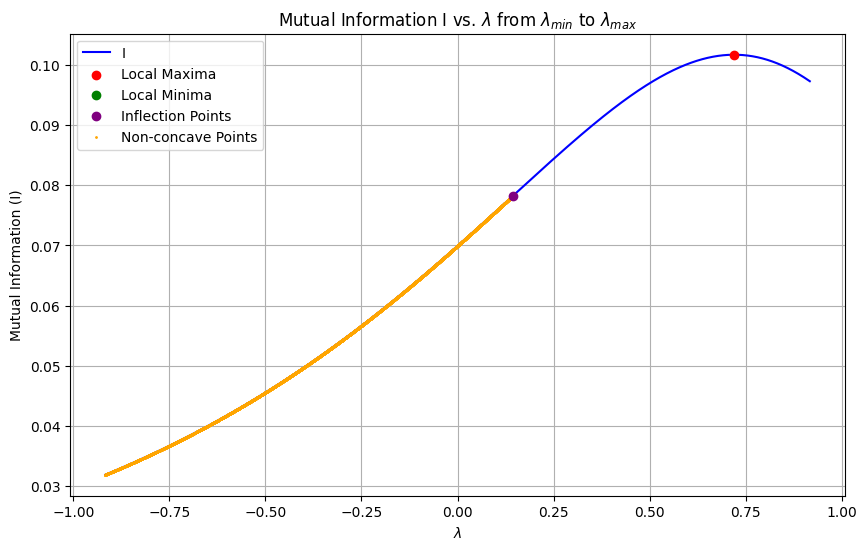


The mutual information I reached the local maxima at I = 0.10172601197446911 when lambda = 0.7200368538103291


In [8]:
# seed = random.randint(10000)
seed = 42
print(f'The current seed is: {seed}')
main(seed)

## Test Region

Conduct test on whether the maximum of the mutual information is the same as accessible information calculated by SOMIM

In [9]:
import somim_module

def verify_against_somim(seed=None):
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    print(f'The current seed is: {seed}')

    n = 2             # Dimension of Hilbert space (e.g., n=2 for qubit, n=4 for two-qubit system)
    J = 2             # Number of quantum states in ensemble
    K_max = n**2      # Max number of POVM elements

    # Initialize 2 qubit states and their corresponding probabilities
    rho0, rho1 = randomize_point()
    p0, p1 = randomize_prob()
    rho = [rho0, rho1]
    p = [p0, p1]

    # Calculating mu and lambda
    mu = cal_mu(rho0, rho1)
    lambda_min, lambda_max = cal_lambda(rho0, rho1)

    # Output the input values
    print(f"Qubit states: \nQubit 0: (with probability: {p0}) \n{rho0} \n\nQubit 1: (with probability: {p1}) \n{rho1}")

    # Method A: Notebook Implementation
    print("\nRunning Notebook Implementation Optimization...")

    # Initialize data range and find the corresponding values for plotting.
    lambda_values = np.linspace(lambda_min, lambda_max, 10000)
    I_values = []

    for la in lambda_values:
        H = cal_H(la, mu, rho0, rho1)
        pi = cal_pi(H)
        I = mutual_information(p, rho, pi)
        I_values.append(I)

    I_values = np.array(I_values)

    _, mi_sweep = binary_search_maxima(lambda_values, I_values)
    print("Finished Notebook Implementation Optimization.\n")

    # Method B: SOMIM
    print("Running SOMIM Optimization...")

    # Prepare data for C++ (N x N x J tensor)
    E_np = np.zeros((n, n, J), dtype=np.complex128)
    E_np[:, :, 0] = p0 * rho0
    E_np[:, :, 1] = p1 * rho1
    
    # Initialize solver
    solver = somim_module.SOMIM(n, J, K_max)
    solver.setDirectGrad(50)
    solver.setTolerance(1e-10)
    solver.set_ensemble_from_numpy(E_np)
    
    # Execute
    mi_somim = solver.getMI()
    print("Finished SOMIM Optimization.\n")

    # Output results
    print(f"Maximum of the Mutual Information (Sweep): {mi_sweep:.10f}")
    print(f"Accessible Information (SOMIM) : {mi_somim:.10f}")

    # Compare
    diff = abs(mi_sweep - mi_somim)
    print(f"\nDifference: {diff:.10e}")
    if diff < 1e-6:
        print("✅ MATCH: The maximum of the mutual information is the same as the accessible information.")
    else:
        print("❌ MISMATCH: Discrepancy detected.")

In [10]:
# Run the verification
seed = 42
verify_against_somim(seed)

The current seed is: 42
Qubit states: 
Qubit 0: (with probability: 0.15601864044243652) 
[[ 0.19595783 -0.03454545]
 [-0.03454545  0.80404217]] 

Qubit 1: (with probability: 0.8439813595575635) 
[[ 0.21677589 -0.39681567]
 [-0.39681567  0.78322411]]

Running Notebook Implementation Optimization...
Finished Notebook Implementation Optimization.

Running SOMIM Optimization...
Finished SOMIM Optimization.

Maximum of the Mutual Information (Sweep): 0.1017260120
Accessible Information (SOMIM) : 0.1017260125

Difference: 4.7843456974e-10
✅ MATCH: The maximum of the mutual information is the same as the accessible information.


Conduct test on whether there is a case where there are more than 2 inflection points on the same side to the local maxima.

In [11]:
count, cases = check_for_inflection(1000, 2000, full_range=False)
plot_inflection_cases(count, cases)

Current idx: 1000
Current count: 0
Current idx: 1100
Current count: 0
Current idx: 1200
Current count: 0
Current idx: 1300
Current count: 0
Current idx: 1400
Current count: 0
Current idx: 1500
Current count: 0
Current idx: 1600
Current count: 0
Current idx: 1700
Current count: 0
Current idx: 1800
Current count: 0
Current idx: 1900
Current count: 0
Current idx: 2000
Current count: 0
Total cases with more than 2 inflection points on the same side to the maxima: 0
